In [1]:
import pandas as pd

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/Users/chuzhan/Downloads/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/Users/chuzhan/Downloads/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/Users/chuzhan/Downloads/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:15]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
data = pd.merge(pd.merge(ratings, users), movies)

In [7]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
mean_ratings = data.pivot_table('rating', index = 'genres', aggfunc = 'mean')

In [9]:
# An aggregate of the movie ratings for each particular genre
mean_ratings[:9]

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Name: rating, dtype: float64

In [10]:
gender_ratings = data.pivot_table('rating', index = 'genres', columns = 'gender', aggfunc = 'mean')

In [11]:
gender_ratings[:5]

gender,F,M
genres,,
Action,3.367474,3.352991
Action|Adventure,3.701213,3.671115
Action|Adventure|Animation,3.843750,4.217082
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071


In [12]:
top_female_ratings = gender_ratings.sort_values(by='F', ascending=False)

In [13]:
#The top 5 highest ranked genre by women
top_female_ratings[:5]

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138


In [14]:
top_male_ratings = gender_ratings.sort_values(by='M', ascending=False)

In [15]:
#The top 5 highest ranked genre by men
top_male_ratings[:5]

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107


In [16]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
data['age_group'] = pd.cut(data.age, range(0, 71, 10), right = False, labels = labels)
data[['age', 'age_group']].drop_duplicates()[:6]

,age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49


In [17]:
data_of_toy_story = data[data.title == 'Toy Story (1995)']

In [18]:
rating_by_age = data_of_toy_story.pivot_table('rating', index = 'age_group', aggfunc = 'mean')

In [19]:
#A breakdown of a movie’s ratings by age, use movie: Toy Story (1995)
rating_by_age[:7]

age_group
0-9      3.919643
10-19    4.017857
20-29    4.201266
30-39    4.302600
40-49    4.104895
50-59    4.024845
60-69         NaN
Name: rating, dtype: float64

In [20]:
#A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie 
#identified by the provided movie_id with the same score
def findUsersGiveSameRating(user_id, movie_id):
    rating_by_movie_id = data[data.movie_id == movie_id]
    rating_by_user_id_movie_id = rating_by_movie_id[rating_by_movie_id.user_id == user_id]
    rating = rating_by_user_id_movie_id.at[rating_by_user_id_movie_id.index[0], 'rating']
    same_rating = rating_by_movie_id[rating_by_movie_id.rating == rating]
    user_ids = same_rating['user_id']
    user_ids_list = [user_ids[user_ids.index[i]] for i in range(user_ids.size)]
    other_user_give_same_rating = [userid for userid in user_ids_list if userid != user_id]
    return other_user_give_same_rating

In [21]:
findUsersGiveSameRating(1, 1193)[:4]

[2, 17, 19, 24]

In [22]:
group_by_user_occupation = data.pivot_table('rating', index = 'occupation', aggfunc = 'mean')

In [23]:
group_by_user_occupation[:3]

occupation
0    3.537544
1    3.576642
2    3.573081
Name: rating, dtype: float64

In [24]:
import matplotlib.pyplot as plt

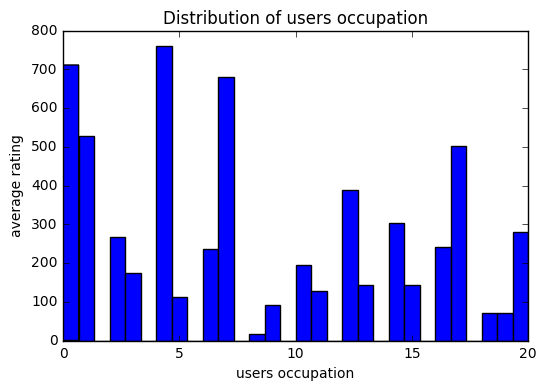

In [25]:
#Some other statistic, figure, data aggregate, or plot that you created using this dataset, 
#along with a short description of what interesting observations you derived from it
users.occupation.plot.hist(bins=30)
plt.title("Distribution of users occupation")
plt.ylabel('average rating')
plt.xlabel('users occupation');
plt.show()
#description : people who have different occupation give various rating for movie, the differences
#between those occupations are very obvious.